<a href="https://colab.research.google.com/github/aszapla/Curso-DL/blob/master/2_1_1_Teor%C3%ADa_Redes_Neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.1.1. Redes neuronales

* Las Redes Neuronales fueron originalmente una simulación abstracta de los sistemas nerviosos biológicos. 

* El primer modelo de red neuronal fue propuesto en [1943 por McCulloch y Pitts](https://link.springer.com/article/10.1007%2FBF02478259) en términos de un modelo computacional de actividad nerviosa. Posteriormente, [Frank Rosenblatt en 1958](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.335.3398&rep=rep1&type=pdf) propuso el primer modelo de neurona o perceptrón. Y finalmente en [1986 Rumelhart, Hinton y Williams](https://web.stanford.edu/class/psych209a/ReadingsByDate/02_06/PDPVolIChapter8.pdf) propusieron el perceptrón multicapa. 

<br> 
<p align="center">
<img src = http://www.dlsi.ua.es/~jgallego/deepraltamira/deep_learning_timeline_1.png>
</p>
<br>


* Están formadas por un conjunto de unidades llamadas neuronas o nodos conectados unos con otros imitando el comportamiento observado en los axones de las neuronas en los cerebros biológicos.


<br>
<p align="center">
![red neuronal]<img src= http://www.dlsi.ua.es/~jgallego/deepraltamira/neural_network.jpg>
</p>
<br>


* La redes neuronales siempre se organizan en capas, con: 

 * Una capa de entrada.
 
 * Una o más capas oculas.
 
 * Una capa de salida.
 
* Cada neurona está conectada con todas las neuronas de la capa anterior.

* Los enlaces entre las neuronas pueden modificar el estado de activación de las neuronas con las que se conecta. 


## Neurona o perceptron 

Cada neurona de la red se estructura de la siguiente forma:

<br>
<p align="center">
![neurona](http://www.dlsi.ua.es/~jgallego/deepraltamira/neurona1.png)
</p>


Es decir: 

* Recibe $x_n$ entradas.

* Pondera estas entradas por unos pesos $w$.

* Suma el resultado de esta ponderación.

* Le añade un umbral o bias $b$.

* Y pasa este resultado por una función $f$ de activación.

<br>

La expresión matemática de una neurona sería: 

<br>

\begin{equation}
y = f \Big( \sum w_n x_n + b \Big)
\end{equation}

<br>

Por lo que (si no tenemos en cuenta la función $f$ de activación) en realidad está aplicando una **función lineal** como la siguiente: 

<br>
<p align="center">
![clasificación lineal](http://www.dlsi.ua.es/~jgallego/deepraltamira/linear_classification.png)
</p>
<br>

Al añadir la función de activación y combinar el resultado de las distintas neuronas capa tras capa lo que obtenemos es un **clasificador no lineal** con el que podemos hacer discriminaciones como la siguiente: 


<br>
<p align="center">
![non linear classification](http://www.dlsi.ua.es/~jgallego/deepraltamira/non_linear_classification.png)
</p>

## Función de activación

* La salida de cada neurona se transforma aplicando una función de activación. 

* De esta forma podemos modificar la salida de la neurona, aplicar **funciones no lineales**, restringir la salida a un rango dado (entre 0 y 1, o entre -1 y 1) o a valores discretos (0 ó 1). 

* En general es mejor utilizar funciones no lineales que devuelvan valores contínuos, ya que esto nos permitirá aprender clasificadores más complejos. 

* También dependiendo de la función utilizada será más fácil o costoso el aprendizaje de los pesos. 

* Esta función tiene que ser **derivable** para poder calcular la pendiente en un punto dado. De esta forma, durante el entrenamiento, podremos saber cómo ajustar los pesos para reducir el error. 

* Las funciones de activación más utilizadas son la función **Sigmoidal** y la **Rectified Linear Unit (ReLU)**, pero hay muchas más: 


<br>
<p align="center">
![activation functions](http://www.dlsi.ua.es/~jgallego/deepraltamira/activation_functions.jpg)
</p>


### Salida de la red en problemas de clasificación categórica

* Podemos utilizar la función sigmoidea como salida en problemas de clasificación binaria. 

* Cuando tenemos más de dos clases se puede añadir una neurona de salida con función sigmoidea para cada clase. 

* Aunque en estos casos se recomienda utilizar la función de activación **Softmax** para la salida de la red. 

* La función **Softmax** asigna probabilidades en el rango $[0, 1]$ a cada clase. 

* Las probabilidades sumarán 1. Esta restricción adicional permite que el entrenamiento converja más rápido.

\begin{equation}
\sigma : \mathbb{R} ^{K} \to [0, 1]^K
\end{equation}


## Entrenamiendo de la red

* Inicialmente los pesos de la red ($w$ y $b$) se inicializan con valores aleatorios. 

* El proceso de entrenamiento consiste en encontrar la combinación de pesos que mejor se ajuste a una muestra de entrenamiento dada. 

&nbsp;
<p align="center">
![clasificación lineal](http://www.dlsi.ua.es/~jgallego/deepraltamira/linear_classification_animation.gif)
</p>
&nbsp;

* Este proceso trata de encontrar un mínimo en la superficie de error formada a partir de los parámetros de la red y la muestra de entrenamiento. 

* Este proceso suele ser muy complejo dado que la superficie normalmente será N-dimensional y contendrá muchos valles, además, en cada momento solo sabemos el **error cometido en ese punto**, con la configuración de parámetros actual. 

&nbsp;
<p align="center">
![backpropagation surface](http://www.dlsi.ua.es/~jgallego/deepraltamira/backpropagation_surface.jpg)
</p>
&nbsp;

* Este proceso de entrenamiento se realiza utilizando el método de "**propagación hacia atrás de errores**" o "**retropropagación**" o, del inglés, ***backpropagation***.

* Este método funciona en dos fases: 

 1. **Paso forward o hacia adelante:** se suministran las muestras de entrenamiento a la red, se obtiene la predicción y se compara esta salida con la salida deseada. Con esto se puede calcular el error (usando una función de error o ***loss***) para cada una de las salidas. 

 2. **Paso backward o hacia atrás:** El error calculado se propaga hacia atrás desde la capa de salida. Cada neurona recibirá la fracción de error cometido por la misma. 
   
   * Este proceso lo realizaremos utilizando el método de optimización de **descenso por gradiente**, el cual se basa en calcular la pendiente en el punto actual y actualizar los pesos **un poco** (que dependerá del parámetro de aprendizaje *learning rate*), moviéndonos en la dirección opuesta al gradiente. 

&nbsp;
<p align="center">
![backpropagation method](http://www.dlsi.ua.es/~jgallego/deepraltamira/backpropagation_method.png)
</p>
&nbsp;

* Además del descenso por gradicente (*gradient descent*) hay otros muchos algoritmos optimizadores que podemos utilizar: *Stochastic gradient descent (SGD), RMSprop, Adagrad, Adadelta*...

&nbsp;
<p align="center">
![Optimizadores](http://www.dlsi.ua.es/~jgallego/deepraltamira/backpropagation_optimizers.gif)
</p>
&nbsp;


* Una vez finaliza el proceso de entrenamiento ya se puede usar la red con los pesos aprendidos para hacer predicciones o clasificaciones. En esta etapa solo será necesario realizar el paso hacia adelante.

<br>

&#10158; A continuación vamos a ver un ejemplo sencillo del entrenamiento de una red formada por una entrada con dos neuronas (datos 2D), una capa oculta con una neurona y una capa de salida con otra neurona. 

Datos aleatorios generados para el entrenamiento:


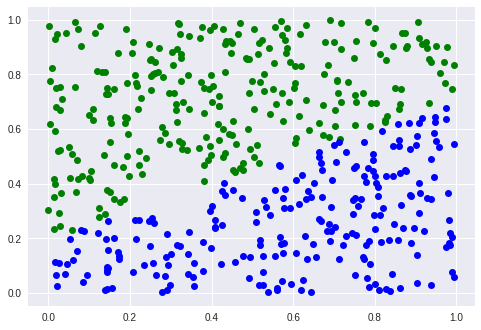

Forma de los datos generados:
(500, 2) (500, 1)


In [0]:
"""
En primer lugar importamos la librerías necesarias y generamos datos de 
entrenamiento aleatorios.
"""

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np

np.random.seed(1)  # Fijamos la semilla

# -------------------------------
def plot(x, y, pred=None):
  x0 = x[y == 0]
  x1 = x[y == 1]
  plt.plot(x0[:,0], x0[:,1], 'go')
  plt.plot(x1[:,0], x1[:,1], 'bo')

  if pred is not None: 
    e = x[y != pred]  # Nos quedamos con los errores de predicción
    plt.plot(e[:,0], e[:,1], 'ro', ms=10)
  
  plt.show()


print('Datos aleatorios generados para el entrenamiento:')

x_train = np.random.random((500,2))
y_train = np.array([(0.5 * x_train[:,0] + 0.2 > x_train[:,1])]).astype(int).T

plot(x_train, y_train.T[0])

print('Forma de los datos generados:')
print(x_train.shape, y_train.shape)

In [0]:
"""
A continuación entrenamos la red neuronal
"""

# -------------------------------
# Función sigmoidea
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

# Inicializamos los pesos de forma aleatoria con media 0
weights0 = 2 * np.random.random((2,1)) - 1
bias0 = np.array([0.0])   # Inicializamos el bias


epocas = 1000
print('Entrenamos durante {} epocas'.format(epocas))

for iter in range(epocas):
    # Paso Forward
    prediccion = nonlin(np.dot(x_train, weights0) + bias0)
        
    # Calculamos el error cometido
    error = y_train - prediccion
    if iter % 100 == 0:
      print(' - Epoca {} - Error {:0.4f}'.format(iter, np.mean(np.fabs(error)) ))

    # Multiplicamos el error cometido por la pendiente de la función en ese 
    # punto, así obtenemos el incremento que tenemos que aplicar sobre los pesos
    delta = error * nonlin(prediccion, True)
    
    # Actualizamos los pesos
    weights0 += np.dot(x_train.T, delta)
    bias0 += np.sum(delta)

print('Error final del entrenamiento: {:0.4f}'.format( np.mean(np.fabs(error)) ))
print('Aciertos con los datos de entrenamiento: {:0.2f}%'.format( accuracy_score(y_train, prediccion > .5) * 100 ))

Entrenamos durante 1000 epocas
 - Epoca 0 - Error 0.5552
 - Epoca 100 - Error 0.4600
 - Epoca 200 - Error 0.4600
 - Epoca 300 - Error 0.4600
 - Epoca 400 - Error 0.0638
 - Epoca 500 - Error 0.0364
 - Epoca 600 - Error 0.0340
 - Epoca 700 - Error 0.0316
 - Epoca 800 - Error 0.0288
 - Epoca 900 - Error 0.0262
Error final del entrenamiento: 0.0230
Aciertos con los datos de entrenamiento: 97.60%


Generamos nuevos datos aleatorios para la evaluación:


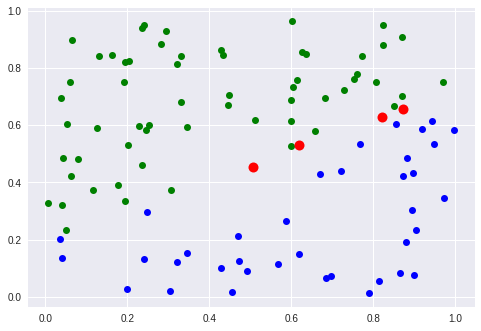

Aciertos con los datos de evaluación: 96.00%


In [0]:
"""
Y por último evaluamos la red con los pesos aprendidos con un nuevo conjunto
de datos
"""

print('Generamos nuevos datos aleatorios para la evaluación:')

x_test = np.random.random((100,2))
y_test = np.array([(0.5 * x_test[:,0] + 0.2 > x_test[:,1])]).astype(int).T


# Realizamos el paso Forward por la red
prediccion = nonlin(np.dot(x_test, weights0) + bias0)


# Calculamos el resultado obtenido y lo mostramos 
prediccion = np.array(prediccion > .5).astype(int)

plot(x_test, y_test.T[0], prediccion.T[0])

print("Aciertos con los datos de evaluación: {:0.2f}%".format( accuracy_score(y_test, prediccion)*100 ))

## Redes neuronales con Keras

* En Keras disponemos de las clases `Sequenzial` y `Dense` para crear una red neuronal tipo secuencial formada por capas de neuronas. 

* La clase [`Sequential`](https://keras.io/models/sequential/) nos permite crear un modelo de red "secuencial" y además nos proporciona los siguientes métodos:

 * `compile`: compila la red para prepararla para el entrenamiento y evaluación. Además nos permite indicar el [optimizador](https://keras.io/optimizers/) y función de pérdida (*loss*) a utilizar.
 
 * `fit`: Inicia el entrenamiento de la red. En este método tenemos que indicar los datos de entrenamiento, el número de épocas y tamaño del batch a utilizar. 
 
 * `evaluate`: Evalua la red usando la función de pérdida y métricas indicadas al compilar. 
 
 * `predict`: Devuelve la predicción de la red para nuevas muestras.

* La clase [`Dense`](https://keras.io/layers/core/#dense) nos permite añadir capas de neuronas a la red, indicando como parámetro el número de neuronas de la capa y la función de activación a utilizar en cada neurona. Por ejemplo: `Dense(1, activation='sigmoid')`








<br>

&#10158; El código que tendríamos que escribir en Keras para clasificar los mismos datos del ejemplo anterior sería: 


Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
 - 1s - loss: 0.4760 - acc: 0.5380
Epoch 2/50
 - 0s - loss: 0.4712 - acc: 0.5660
Epoch 3/50
 - 0s - loss: 0.4660 - acc: 0.6100
Epoch 4/50
 - 0s - loss: 0.4604 - acc: 0.6440
Epoch 5/50
 - 0s - loss: 0.4543 - acc: 0.6740
Epoch 6/50
 - 0s - loss: 0.4480 - acc: 0.7060
Epoch 7/50
 - 0s - loss: 0.4410 - acc: 0.7480
Epoch 8/50
 - 0s - loss: 0.4339 - acc: 0.7720
Epoch 9/50
 - 0s - loss: 0.4262 - acc: 0.7760
Epoch 10/50
 - 0s - loss: 0.4183 - acc: 0.7900
Epoch 11/50
 - 0s - loss: 0.4104 - acc: 0.7980
Epoch 12/50
 - 0s - loss: 0.402

 - 0s - loss: 0.2148 - acc: 0.9320
Epoch 37/50
 - 0s - loss: 0.2092 - acc: 0.9360
Epoch 38/50
 - 0s - loss: 0.2037 - acc: 0.9380
Epoch 39/50
 - 0s - loss: 0.1985 - acc: 0.9440
Epoch 40/50
 - 0s - loss: 0.1936 - acc: 0.9420
Epoch 41/50
 - 0s - loss: 0.1888 - acc: 0.9460
Epoch 42/50
 - 0s - loss: 0.1842 - acc: 0.9520
Epoch 43/50
 - 0s - loss: 0.1798 - acc: 0.9500
Epoch 44/50
 - 0s - loss: 0.1755 - acc: 0.9540
Epoch 45/50
 - 0s - loss: 0.1716 - acc: 0.9580
Epoch 46/50
 - 0s - loss: 0.1678 - acc: 0.9580
Epoch 47/50
 - 0s - loss: 0.1641 - acc: 0.9640
Epoch 48/50
 - 0s - loss: 0.1605 - acc: 0.9680
Epoch 49/50
 - 0s - loss: 0.1572 - acc: 0.9680
Epoch 50/50
 - 0s - loss: 0.1540 - acc: 0.9700
Datos de evaluación:


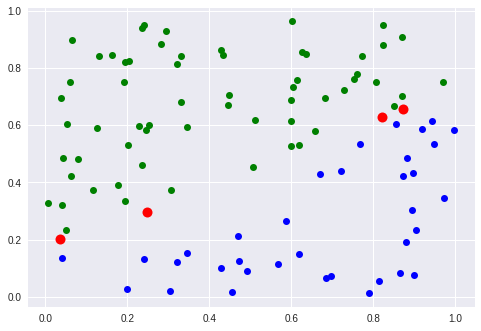

Aciertos en la evaluación: 96.00%


In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from tensorflow import set_random_seed
set_random_seed(2)  # Fijamos la semilla de TF

# Definimos la red
model = Sequential()
model.add(Dense(1, input_dim=2))          # Capa de entrada con 2 neuronas e intermedia con 1 neurona
model.add(Dense(1, activation='sigmoid')) # Capa de salida con 1 neurona
print(model.summary())                    # Mostramos un resumen de la red

# La compilamos e iniciamos el entrenamiento
model.compile(optimizer=SGD(lr=.05), loss='mae', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=50, batch_size=32, verbose=2)

prediccion = model.predict( x_test )

print("Datos de evaluación:")
prediccion = np.array(prediccion > .5).astype(int)
plot(x_test, y_test.T[0], prediccion.T[0])
print("Aciertos en la evaluación: {:0.2f}%".format( accuracy_score(y_test, prediccion)*100 ))

## Overfitting

* Se denomina "*overfitting*" o sobreajuste al efecto producido al sobreentrenar un algoritmo de aprendizaje con unos ciertos datos para los que se conoce el resultado deseado. 

* Cuando un sistema se sobreentrena el algoritmo puede quedar ajustado a unas características muy específicas de los datos de entrenamiento que no tienen relación causal con la función objetivo.

* En este caso el algoritmo no generaliza. 


<br>
<p align="center">
![Overfitting example](http://www.dlsi.ua.es/~jgallego/deepraltamira/overfitting_example.png)
</p>
<br>

* Este problema es bastante frecuente al entrenar redes neuronales (en general).

* El motivo suele ser:
 * Pocos datos de entrenamiento 
 * Uso de modelos de red no adecuados a la cantidad o variabilidad de los datos de entrenamiento. 

* Si representamos en una gráfica el error cometido por la red durante el entrenamiento para la muestra de aprendizaje (training) y la de validación (validation), un ejemplo típico de overfitting sería: 

<br>
<p align="center">
![Overfitting curve](http://www.dlsi.ua.es/~jgallego/deepraltamira/overfitting_curve1.png)
</p>
<br>

* Tenemos diferentes soluciones para evitar este problema:

 * Detener el entrenamiento antes de que suceda (en la línea de puntos de la gráfica). 
 
 * Si es demasiado pronto para detener el entrenamiento (porque el error todavía es alto) y tiene una **varianza alta** podríamos: 
 
   * Añadir más datos o datos más variados al training set. 
   * Aplicar aumentado de datos. 
   * Reducir la complejidad de la red neuronal. 
   * Usar técnicas para evitar el overfitting como Dropout o Batch Normalization. 

* En los casos en los que tengamos un **bias alto** deberemos aumentar el tamaño de la red o modificar su topología. 

### Dropout

* Esta operación consiste en desconectar aleatoriamente un porcentaje de las neuronas de la red en cada iteración del entrenamiento.

<br>
<p align="center">
![Dropout](http://www.dlsi.ua.es/~jgallego/deepraltamira/dropout.png)
</p>
<br>

* En Keras tenemos la clase [Dropout](https://keras.io/layers/core/#dropout) que nos permite aplicar fácilmente esta técnica sobre las capas de la red.

 * Esta clase recibe como parámetro el porcentaje (entre 0 y 1) de las neuronas a desactivar en cada iteración. 



&nbsp;

&nbsp;


---


<font size="3">
**[&#10158;  A continuación vamos a ver las Redes Neuronales Convolucionales &#10158; ](https://colab.research.google.com/drive/1XqIp8-tK8JZ-gzOuqu5tuUGPajOFXaKX)**
</font>



---

